# Data Analysis ( Titanic Data )

## Data description
* Survived :	Survived (1) or died (0)
* Pclass   :	Passenger’s class
* Name     :	Passenger’s name
* Sex      :	Passenger’s sex
* Age      :	Passenger’s age
* SibSp    :	Number of siblings/spouses aboard
* Parch    :	Number of parents/children aboard
* Ticket   :	Ticket number
* Fare     :	Fare
* Cabin    :	Cabin
* Embarked :	Port of embarkation




In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from statsmodels.graphics.mosaicplot import mosaic
from scipy.stats import t

%config InlineBackend.figure_format = 'retina'

## 1. Read CSV

In [115]:
DATA = pd.read_csv('titanic-data.csv')
# preview DATA
DATA.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [116]:
DATA.info() # Data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [117]:
DATA.isnull().sum() # Check null

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

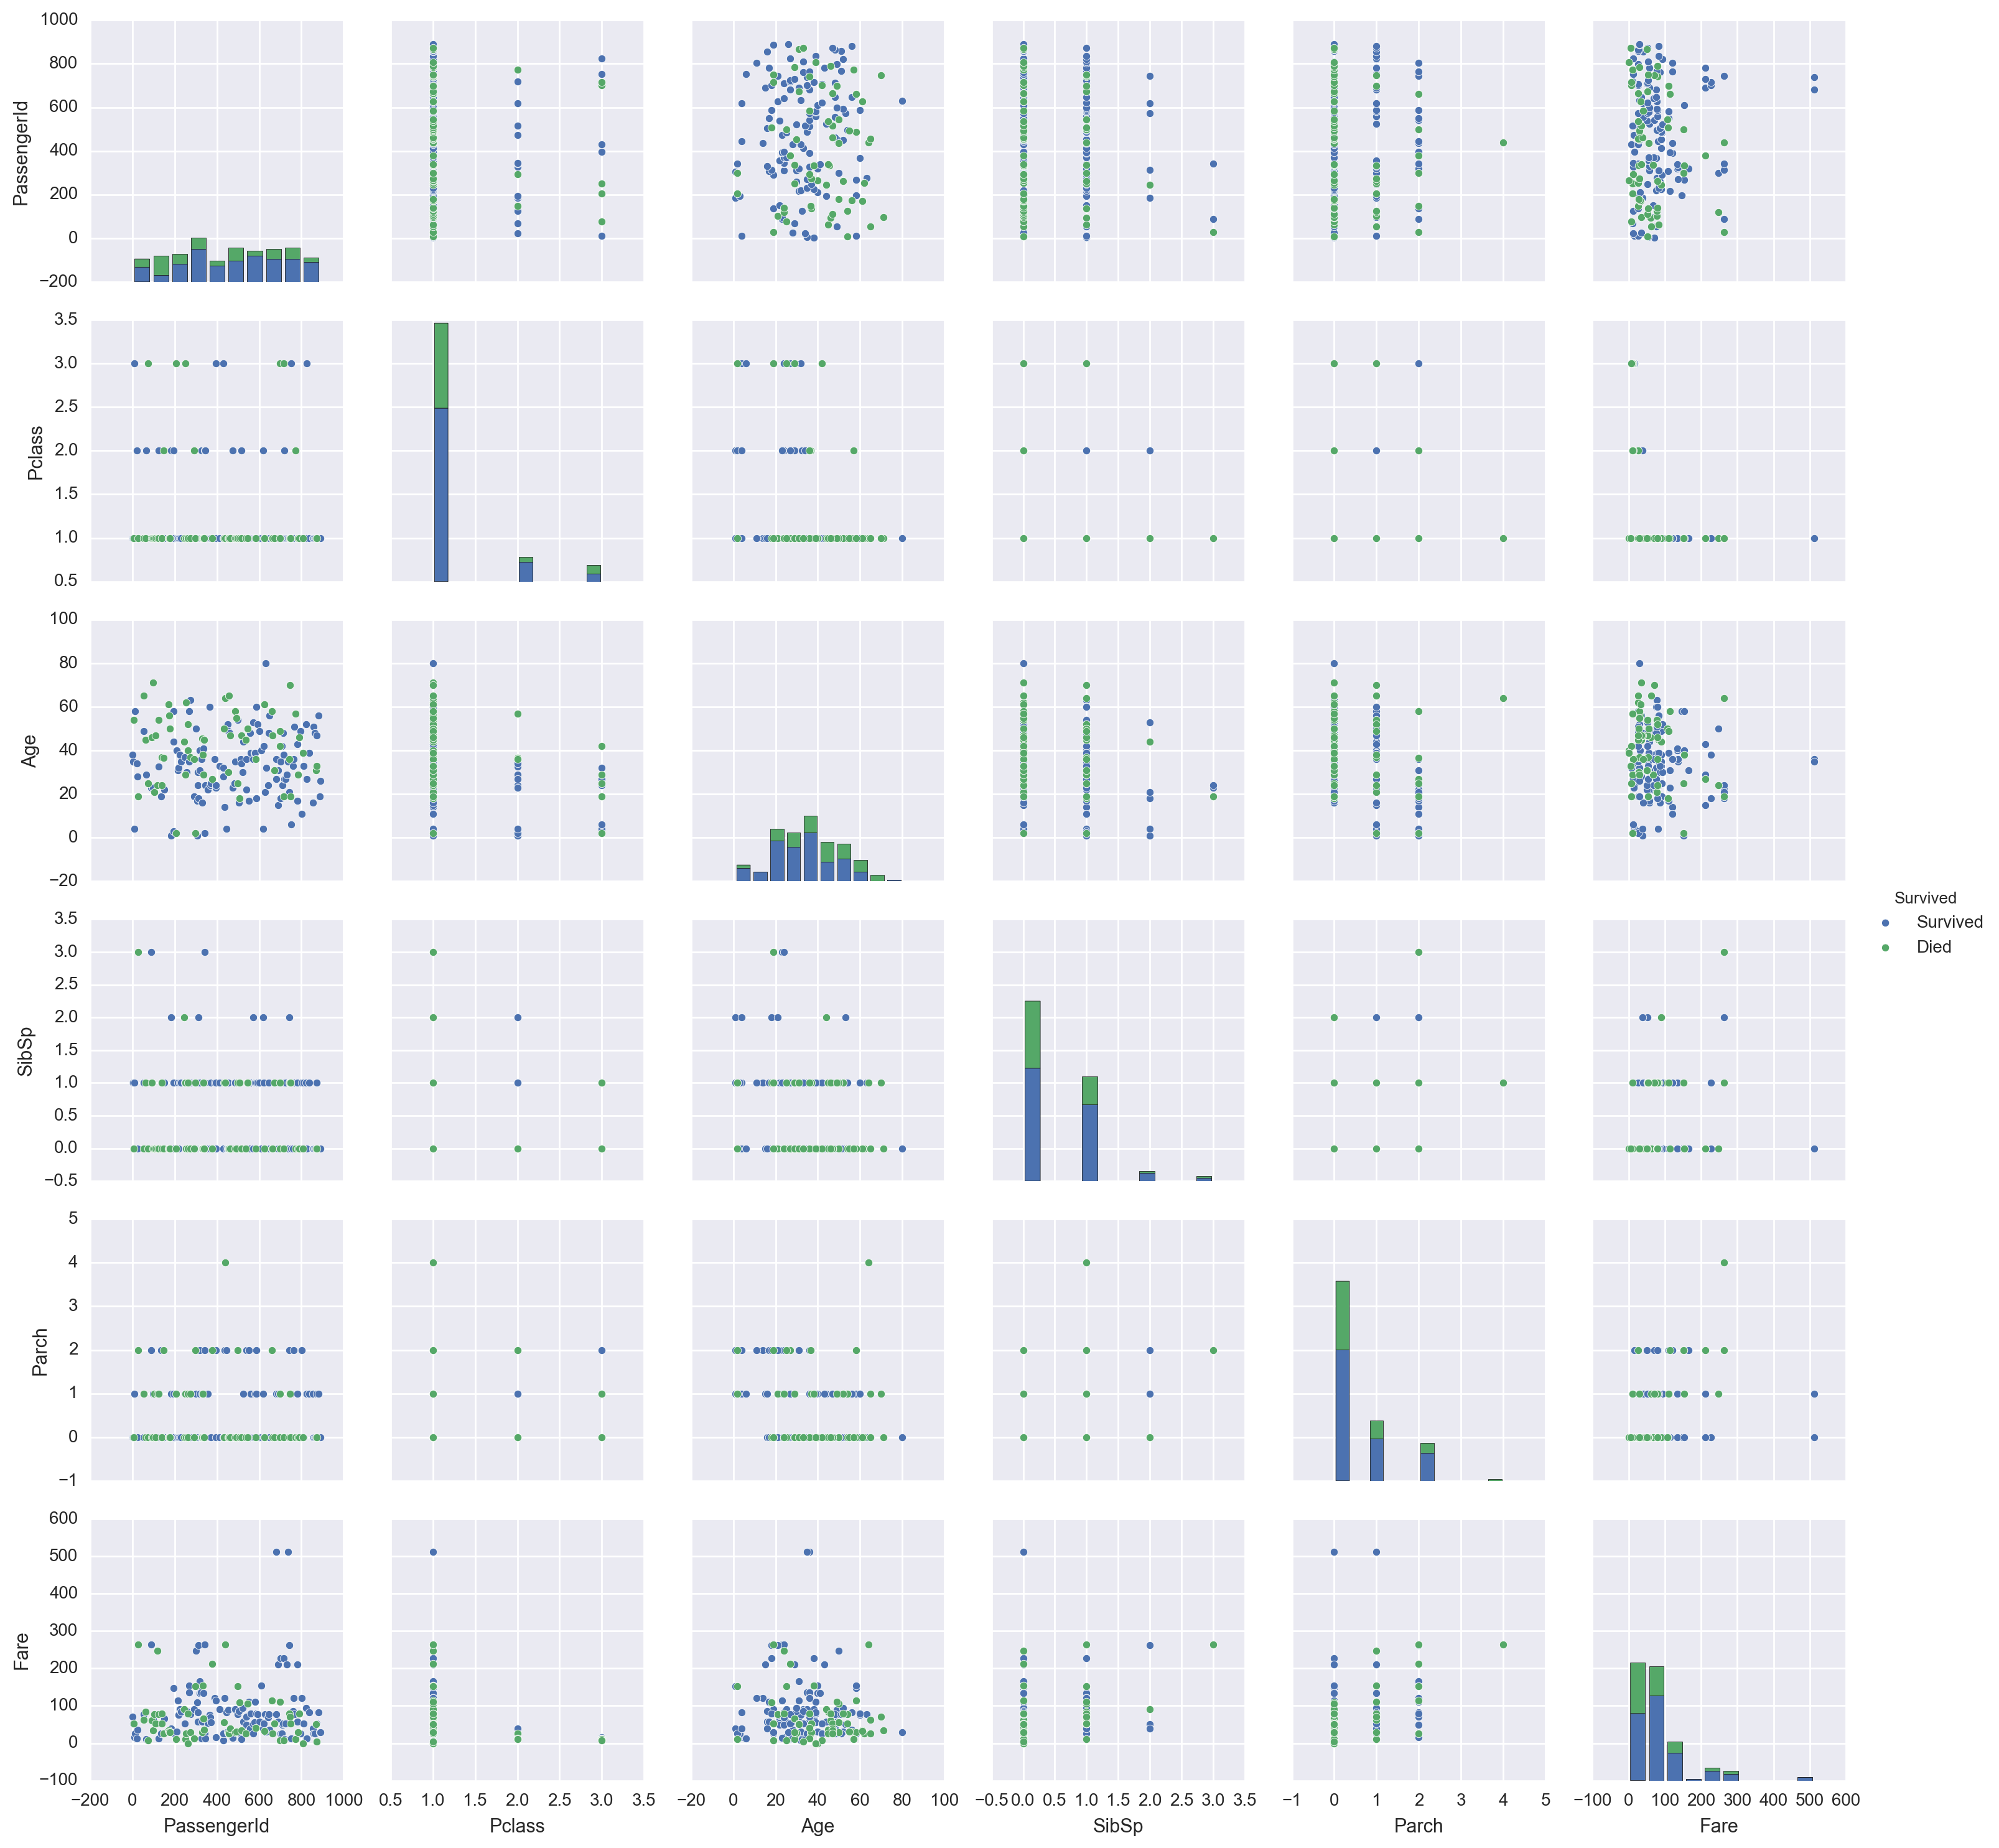

In [118]:
# function filtering 'Survived' column
def check(x) :
    if x == 0:
        return 'Died'
    return 'Survived'

# Pair plot
# Drop na first. checking a pair plot first before replacing na to any value.
sns.set()
prev = DATA.dropna()
prev = prev.copy()

prev.loc[:,'Survived']=prev.loc[:,'Survived'].replace([0,1],["Died","Survived"])
sns.pairplot(prev, hue ='Survived')
plt.show()

### Checking the pair plot, I can summarise relation between variables. In each Bar graph about Pclass, Age, SibSp, Parch and Fare, there are differences of survive rate within each variables.
#### Questions : Is there any relations  ?
1. Survived vs Age
2. Survived vs Gender
3. Survived vs Pclass
4. Survived vs Embark
5. Survived vs Family
6. Other variables which is related.


## Age

* check variable Age.
* In wikidepia document, people embarked women and children first to life boat. So i think there are some differences of survive rate between ages.

In [119]:
# Check the null
DATA['Age'].isnull().sum()

177

In [120]:
# There is no evidence to estimate age. 
# No alternative solution rather than drop null variable
# Drop na in Age
df_age = DATA[['Age','Survived']].dropna()

In [121]:
df_age['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

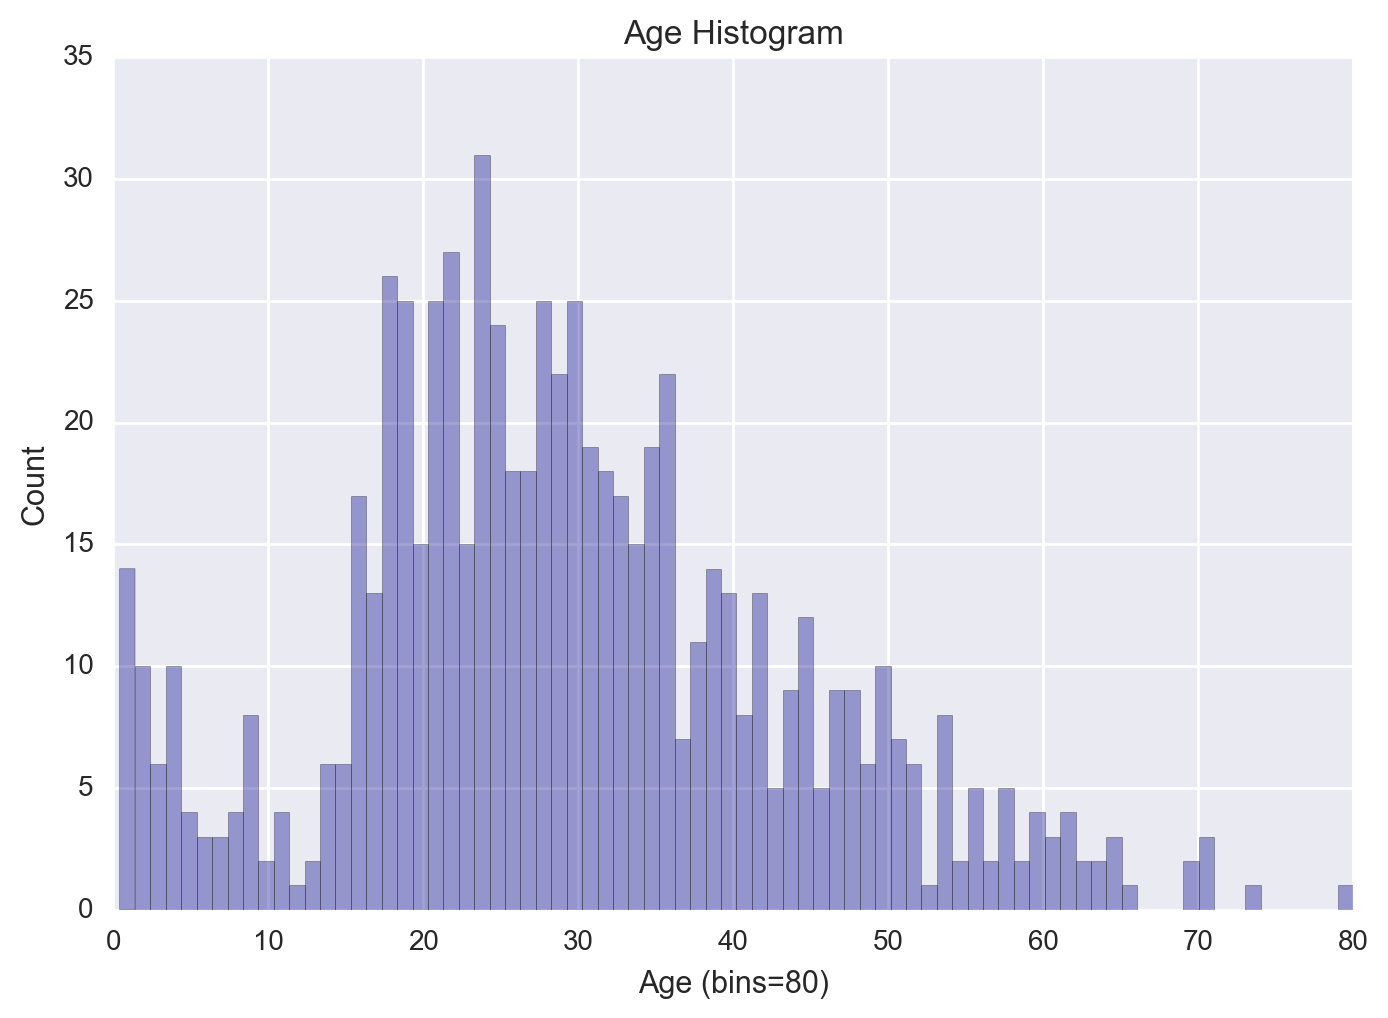

In [122]:
sns.distplot(df_age['Age'],bins=80, color='#171796',kde=False)
xlab = 'Age (bins=80)'
ylab = 'Count'
title = 'Age Histogram'
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.title(title)

plt.show()

#### There were many babies in Taitanic which i didn't know. 
#### Most of passenger's age were between 20 and 40.

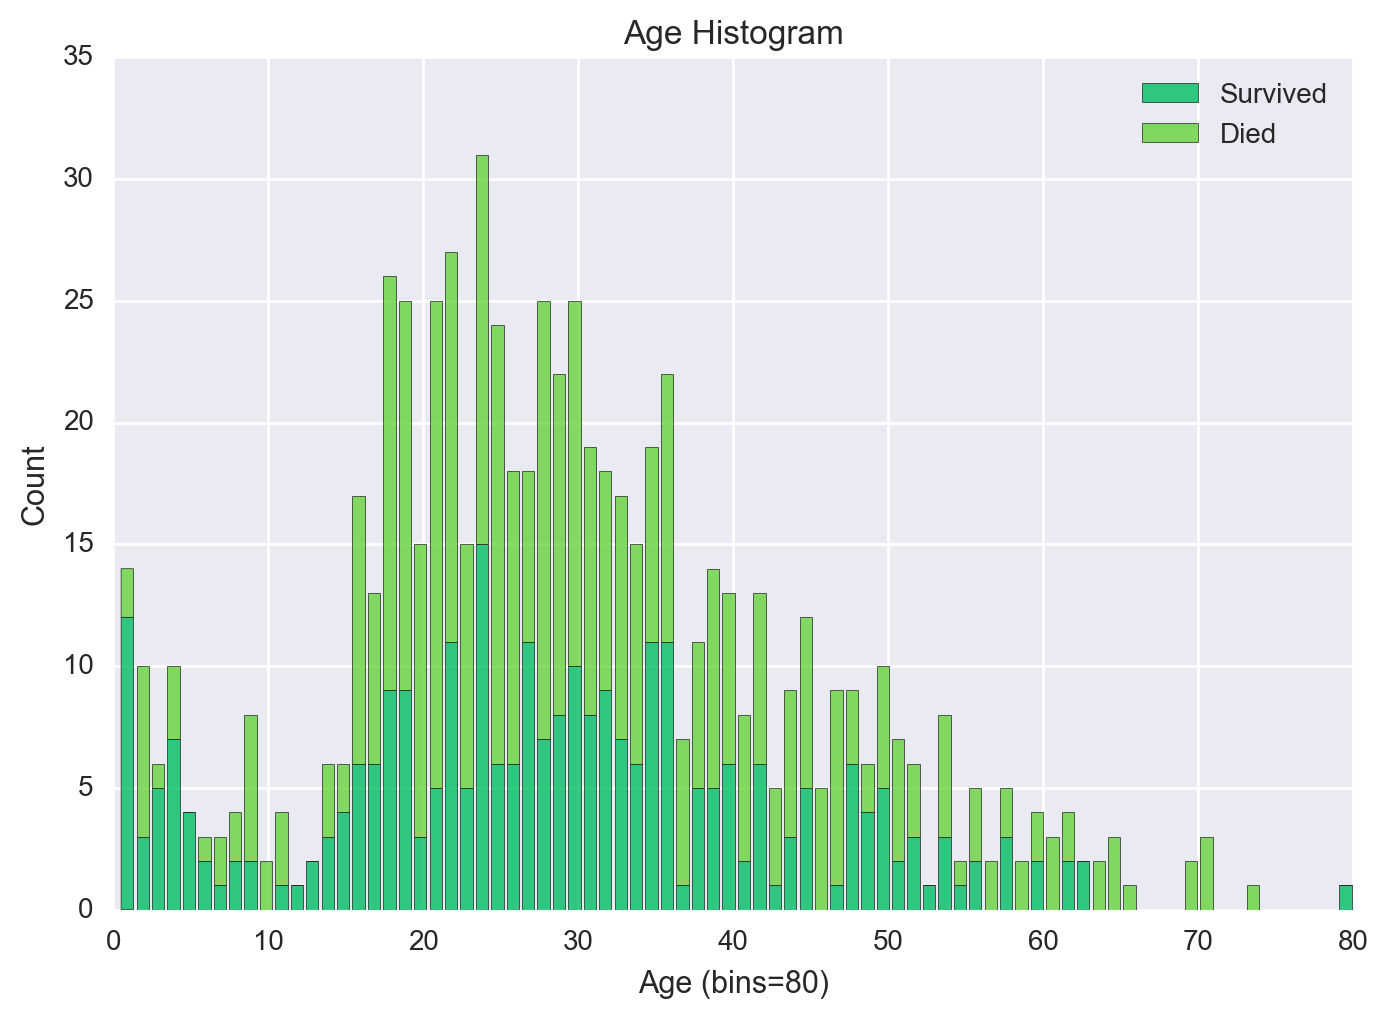

In [123]:
# Stacked histogram
x1 = df_age['Age'][df_age['Survived']==1]
x2 = df_age['Age'][df_age['Survived']==0]
plt.hist([x1,x2], bins=80, stacked=True, color=['#00BF63','#66D43D'],alpha=0.8, label=['Survived','Died'])
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.title(title)
plt.legend()
plt.show()


#### Most of children survived. I want to check more with setting bins with 10.

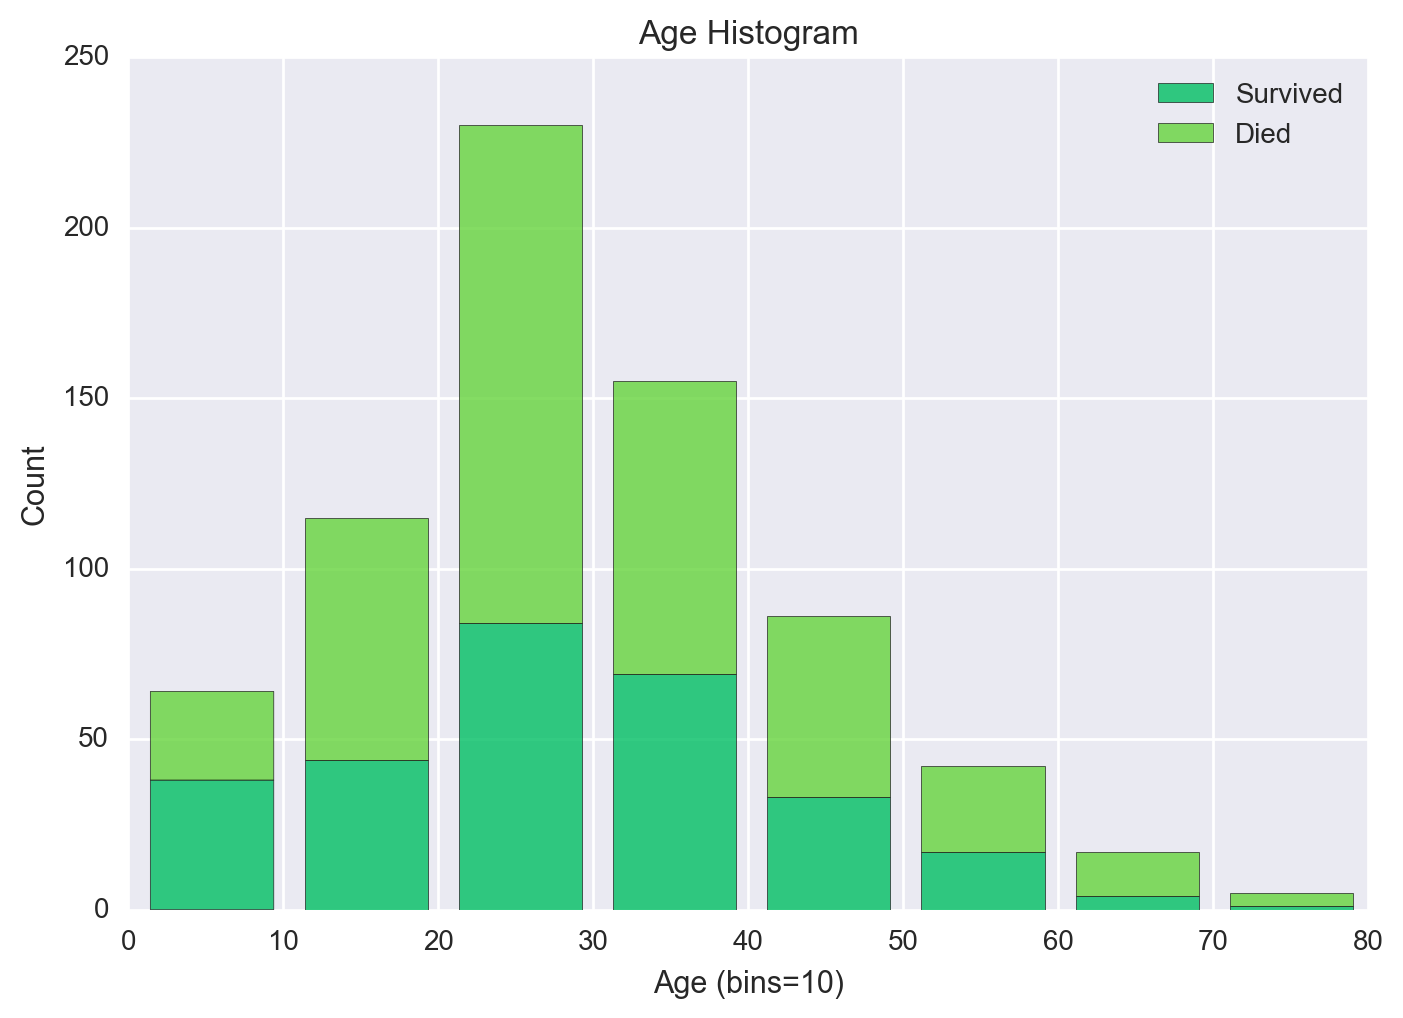

In [124]:
x1 = df_age['Age'][df_age['Survived']==1]
x2 = df_age['Age'][df_age['Survived']==0]
plt.hist([x1,x2], bins=8, stacked=True, color=['#00BF63','#66D43D'],alpha=0.8, label=['Survived','Died'])
plt.xlabel('Age (bins=10)')
plt.ylabel(ylab)
plt.title(title)
plt.legend()
plt.show()

In [125]:
#Binning
bins = [0,10,20,30,40,50,60,70,80]

cats = pd.cut(df_age['Age'],bins, right=False)

In [126]:
# Survived rate grouped by Age interval
df_age['Age'] = cats
df_age.groupby('Age').mean()

,Survived
Age,
"[0, 10)",0.612903
"[10, 20)",0.401961
"[20, 30)",0.350000
"[30, 40)",0.437126
"[40, 50)",0.382022
"[50, 60)",0.416667
"[60, 70)",0.315789
"[70, 80)",0.000000


#### Obviously, children survival rate was higher than adult.
#### This result fit with statement that children were embarked to life boat first.

## Gender

* I want to check there ar differences between gender first

In [127]:
DATA['Sex'].describe()

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

In [128]:
# Drop na age which has no evidence to estimate null values .
df_age_gender=DATA[['Age','Sex','Survived']].dropna()

In [129]:
df_age_gender.head()

,Age,Sex,Survived
0,22.0,male,0
1,38.0,female,1
2,26.0,female,1
3,35.0,female,1
4,35.0,male,0


In [130]:
# Survive rate
df_age_gender.groupby('Sex').mean()

,Age,Survived
Sex,,
female,27.915709,0.754789
male,30.726645,0.205298


* Women survived more than men.

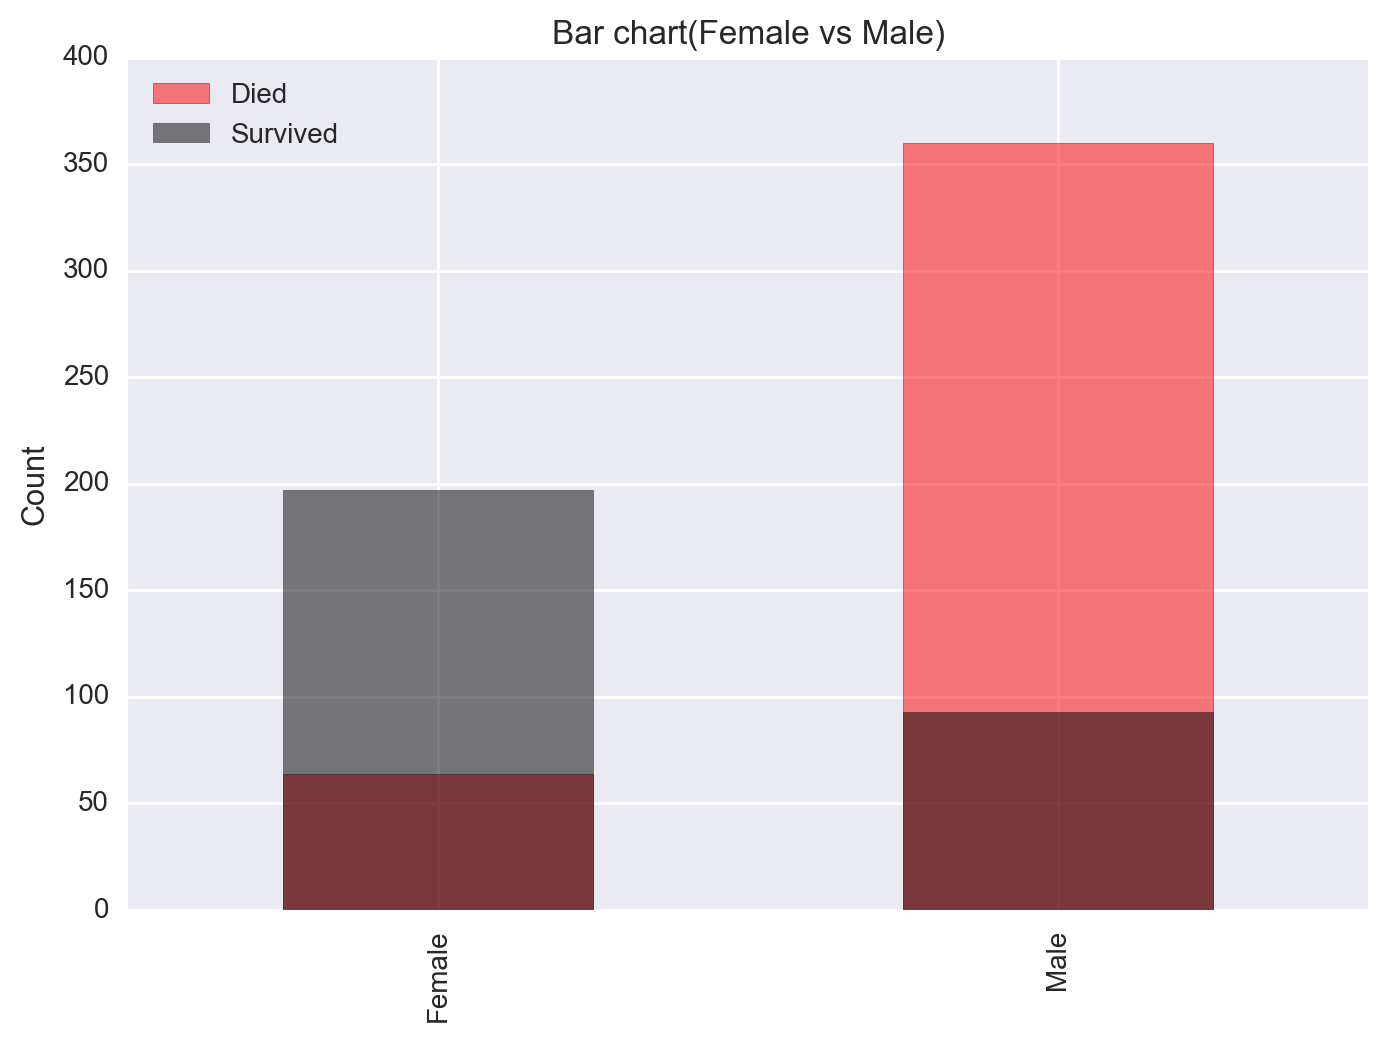

In [131]:
# Bar graph
fig = plt.subplot()
Died = df_age_gender[df_age_gender.Survived==0].Sex.value_counts().sort_index()
Survived = df_age_gender[df_age_gender.Survived==1].Sex.value_counts().sort_index()
Died.plot(kind='bar',color='red',label='Died',alpha=0.5,)
Survived.plot(kind='bar',color='black',label='Survived',alpha=0.5)
fig.set_ylabel('Count')
fig.set_title('Bar chart(Female vs Male)')
fig.set_xticklabels(['Female','Male'])
plt.legend(loc='best')
plt.show()

#### Female survival rate is higher than male. 
### Check survive rate with three categorical variables.

In [132]:
# Function to change 'Age' into three groups (Children, Male, Female)
def check(value) :
    if value == 'female' :
        return 'Female'
    else :
        return 'Male'
def survive(value) :
    if value == 0 :
        return 'Died'
    else :
        return 'Survived'


In [134]:
# Create new column 'Group' (Children,Male,Female)
df_age_gender['Group'] = df_age_gender['Sex'].map(check)

In [135]:
pd.options.mode.chained_assignment = None
df_age_gender['Group'][df_age_gender['Age']<18] = 'Children'
df_age_gender['Survived'] = df_age_gender['Survived'].map(survive)

In [136]:
ct = pd.crosstab(df_age_gender.Survived,df_age_gender.Group)
ct

Group,Children,Female,Male
Survived,,,
Died,52,47,325
Survived,61,159,70


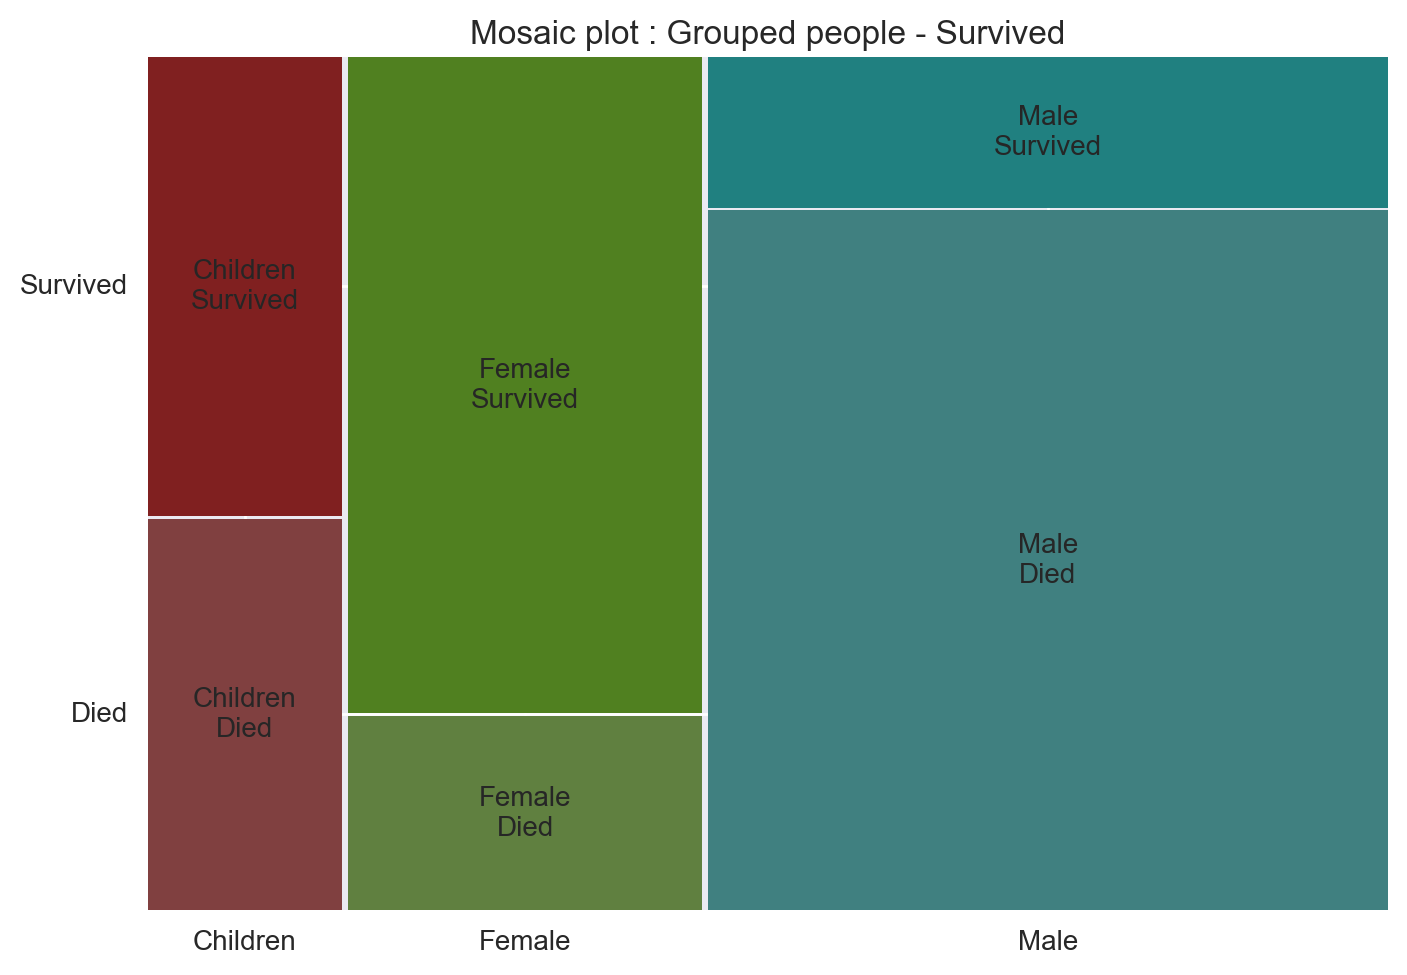

In [137]:
mosaic(ct.unstack())
plt.title("Mosaic plot : Grouped people - Survived" )
plt.show()

#### As we can see tables and mosaic plot, children and female survived more than male.
#### Women and children were embarked first. 

## Class

In [138]:
# Assign df_class
df_class = DATA[['Survived','Pclass']]
df_class = df_class.copy()
df_class.Survived = df_class.Survived.map(survive)

In [139]:
ct = pd.crosstab(df_class.Survived,DATA.Pclass)
ct

Pclass,1,2,3
Survived,,,
Died,80,97,372
Survived,136,87,119


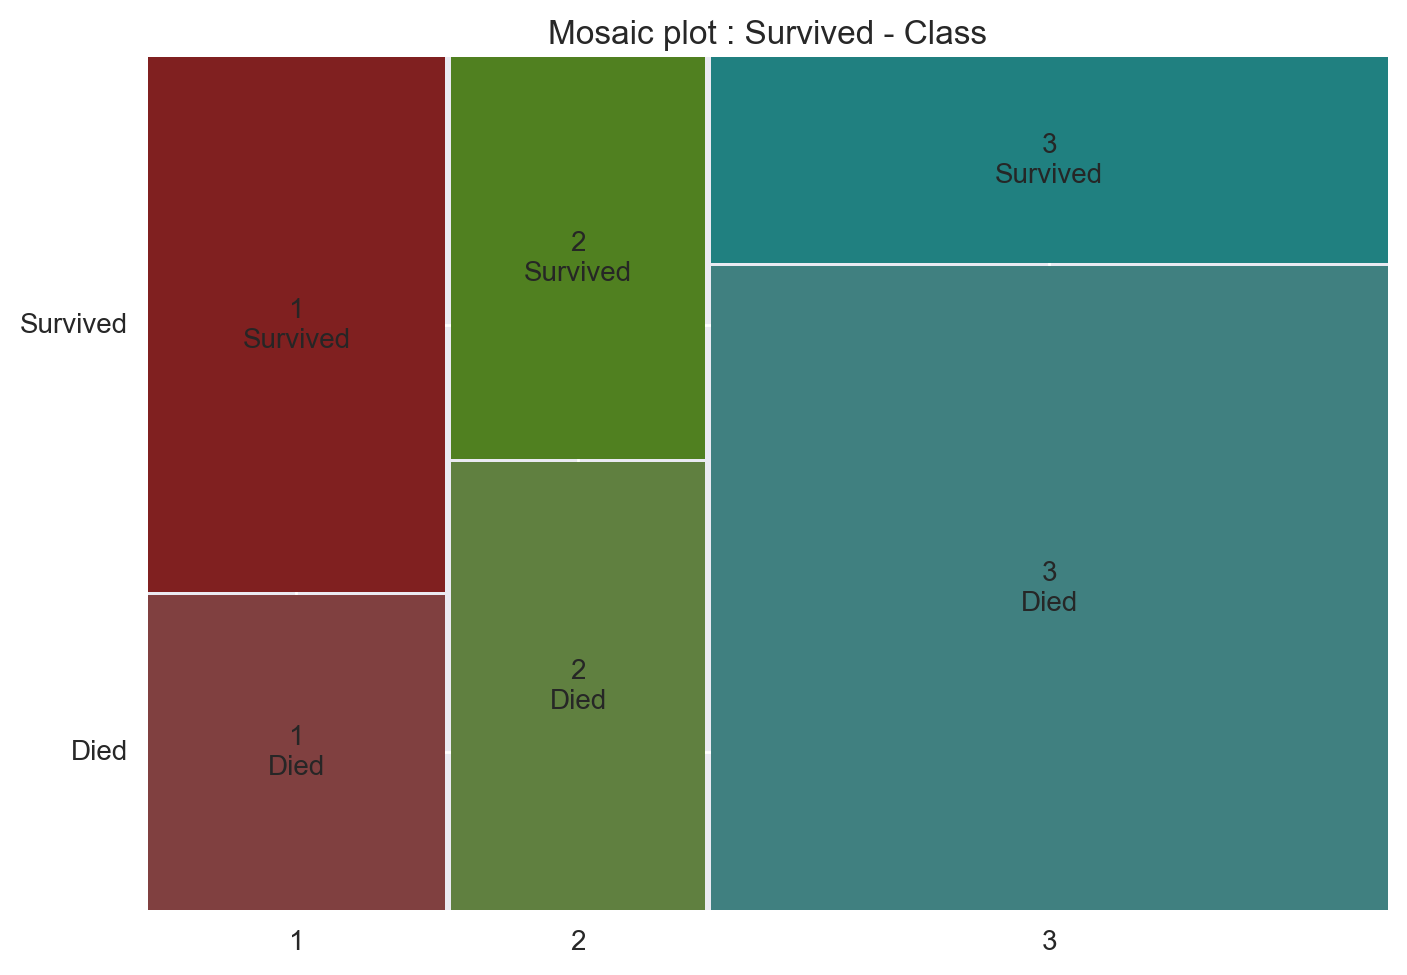

In [140]:
# Mosaic plot
mosaic(ct.unstack())
plt.title("Mosaic plot : Survived - Class" )
plt.show()

#### Passengers who were in better class survived more.
#### I want to check how this is happened, so let's see there are any other relations with other variables.

In [141]:
# Create df_class with dropping na.
# There is no evidence to estimate null value.
df_class = DATA[['Pclass','Age','Sex','Survived']].dropna()
df_class.head()

,Pclass,Age,Sex,Survived
0,3,22.0,male,0
1,1,38.0,female,1
2,3,26.0,female,1
3,1,35.0,female,1
4,3,35.0,male,0


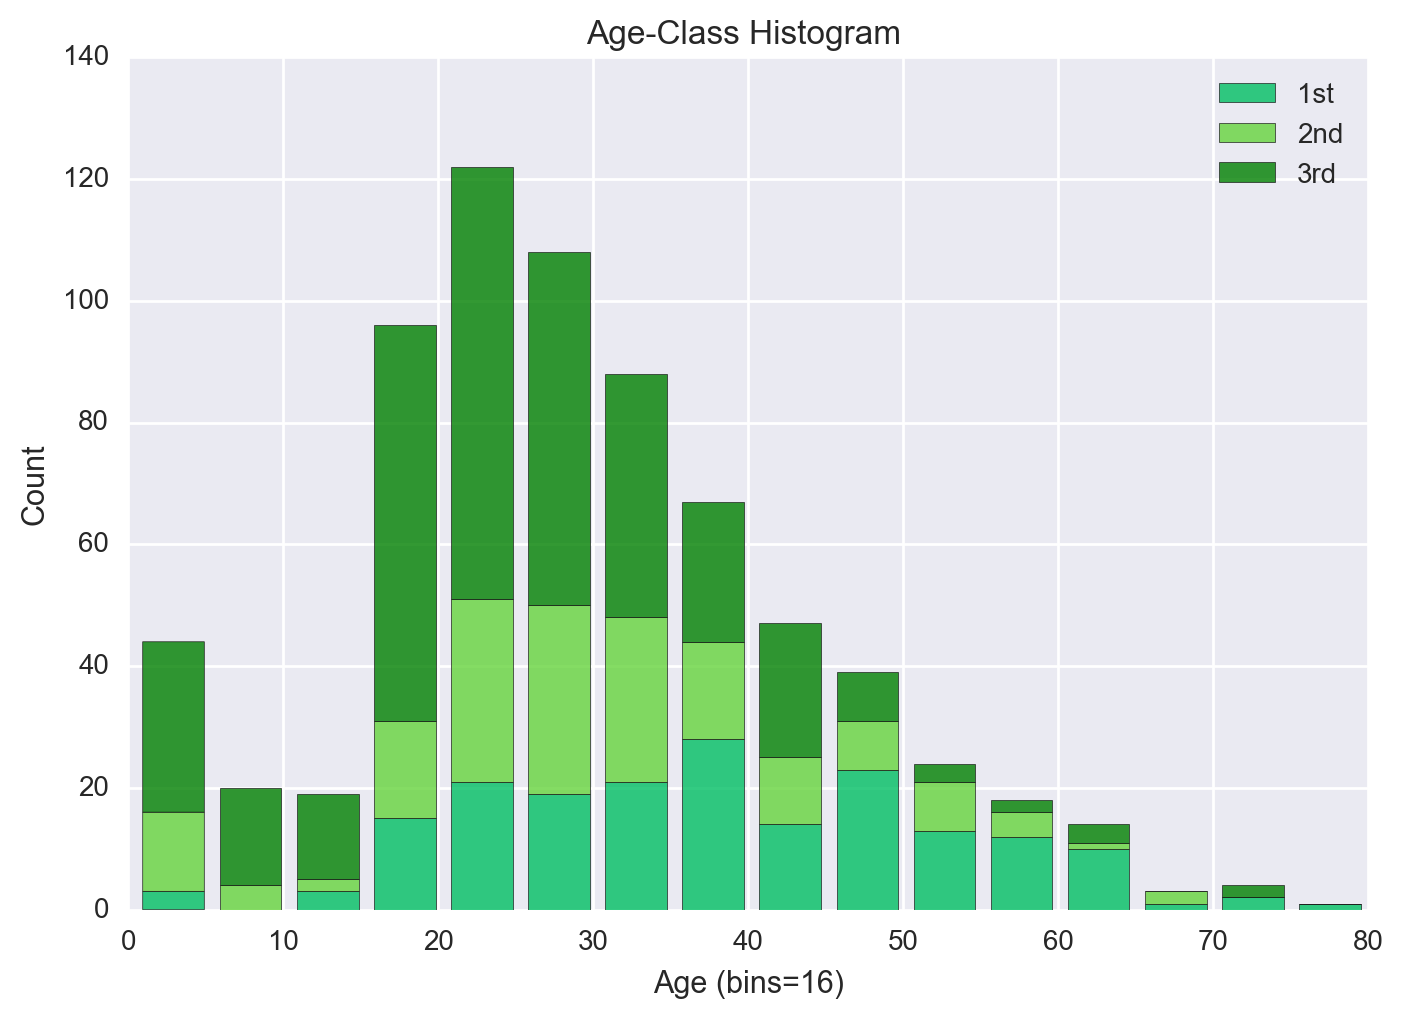

In [142]:
x1 = df_class['Age'][df_class['Pclass']==1]
x2 = df_class['Age'][df_class['Pclass']==2]
x3 = df_class['Age'][df_class['Pclass']==3]
plt.hist([x1,x2,x3], bins=16, stacked=True, color=['#00BF63','#66D43D','green'],alpha=0.8, label=['1st','2nd','3rd'])
plt.xlabel('Age (bins=16)')
plt.ylabel(ylab)
plt.title('Age-Class Histogram ')
plt.legend()
plt.show()

#### In this histogram, there were more children in 3rd class. However, Sum of passengers in 3rd were bigger than 1st.
#### Check this with PDF.

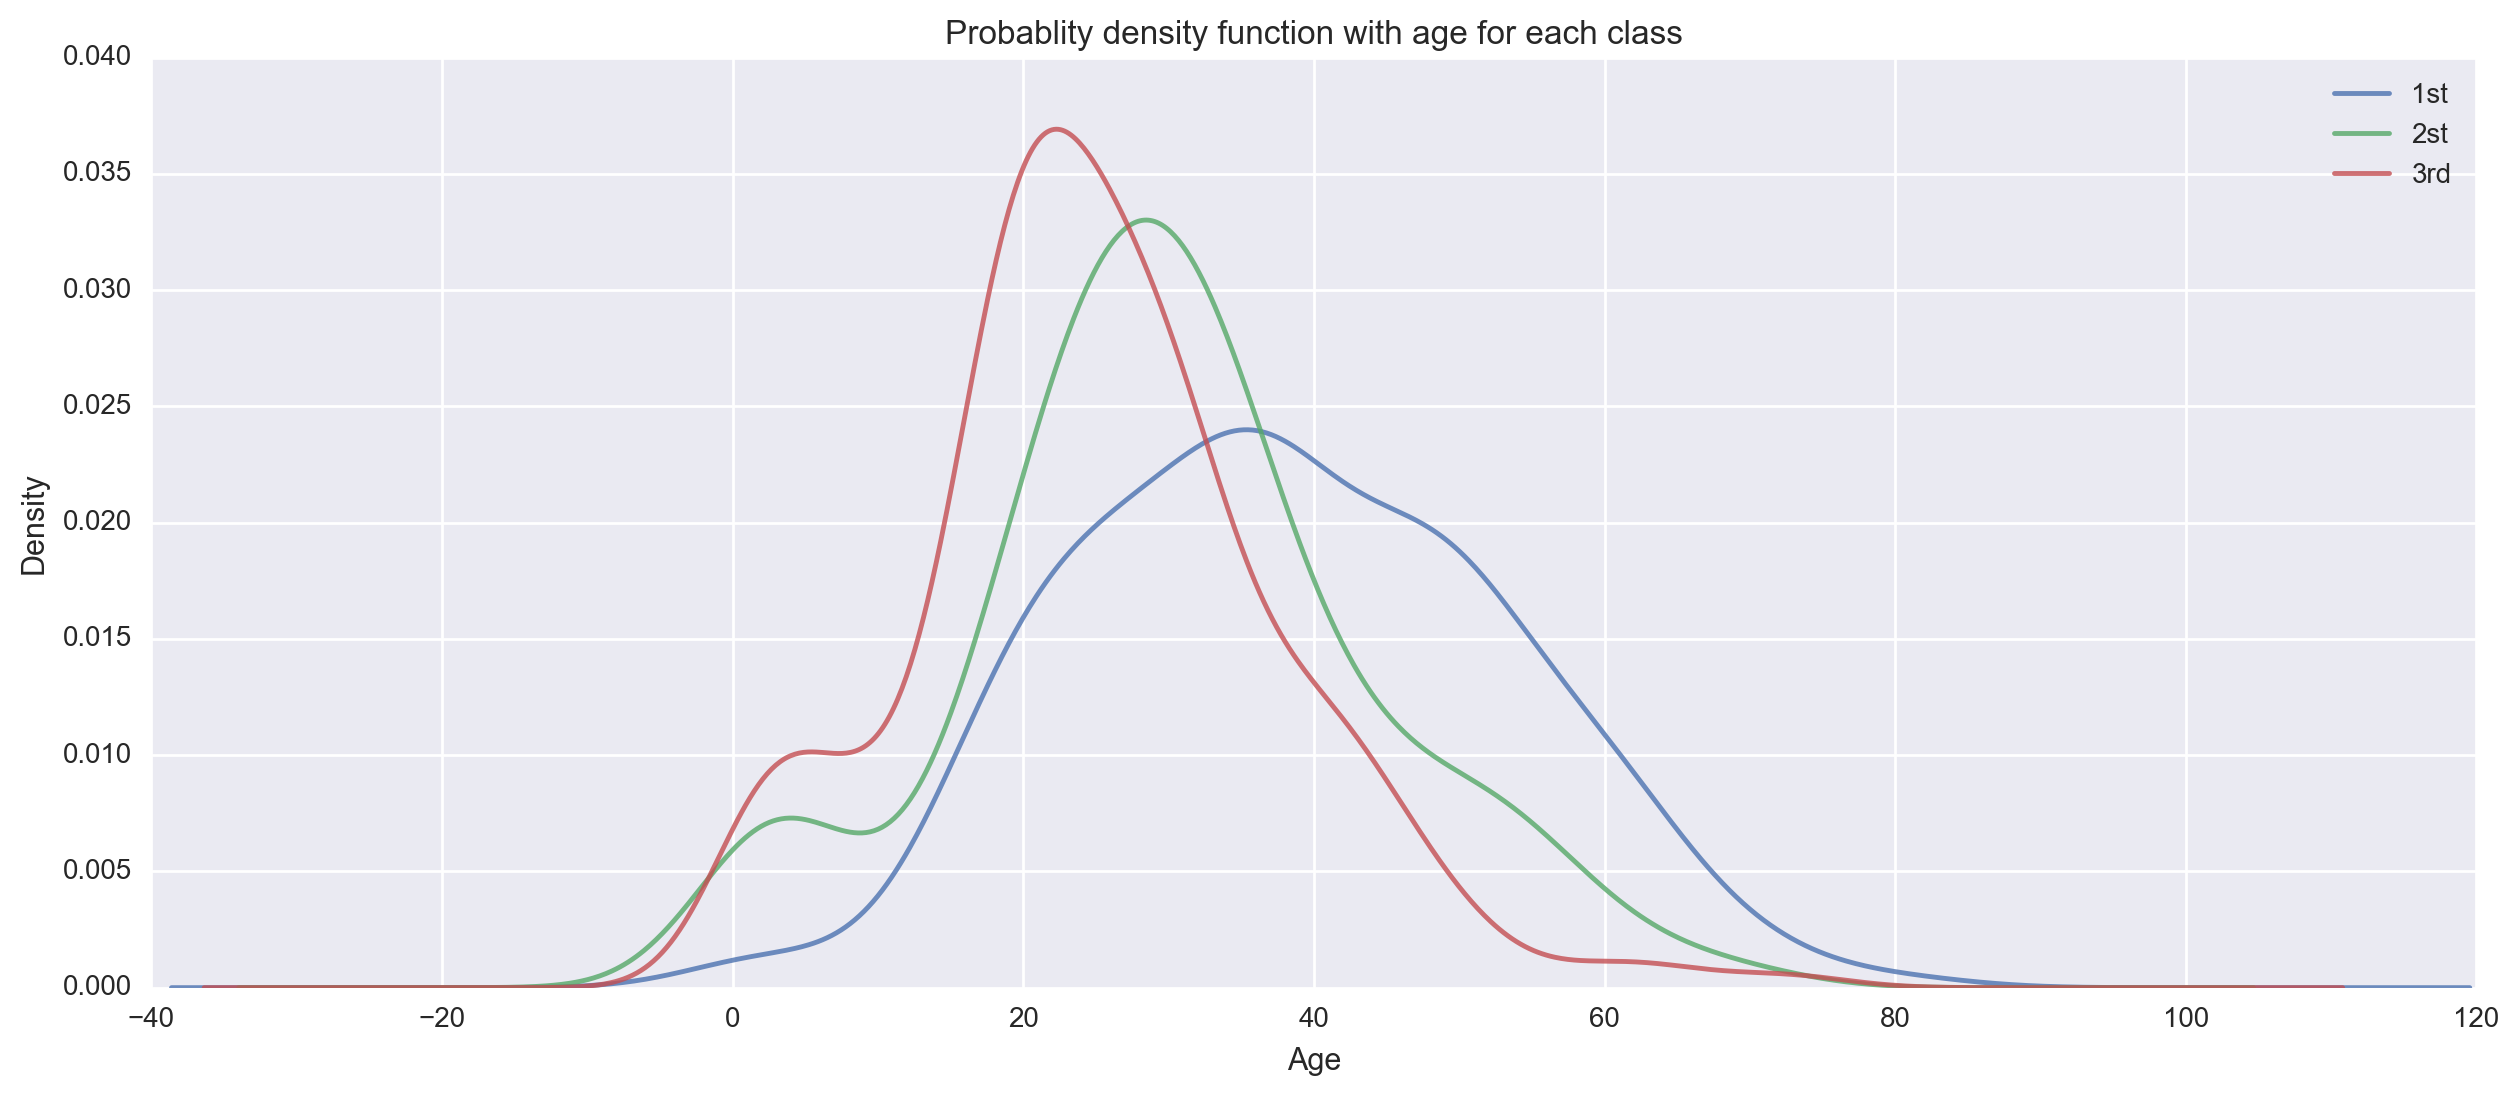

In [143]:
fig = plt.figure(figsize=(15, 6))

df_class['Age'][df_class['Pclass']==1].plot(kind='density', label='1st', alpha=0.8)
df_class['Age'][df_class['Pclass']==2].plot(kind='density', label='2st', alpha=0.8)
df_class['Age'][df_class['Pclass']==3].plot(kind='density', label='3rd', alpha=0.8)
plt.xlabel('Age')
plt.title("Probablity density function with age for each class" )
plt.legend(loc='best')

plt.show()

#### It seems that more survival rate in better class doen't have relation with age.
#### Check this with gender variable.
### Gender vs Class

In [144]:
ct = pd.crosstab(DATA.Sex,DATA.Pclass)
ct

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


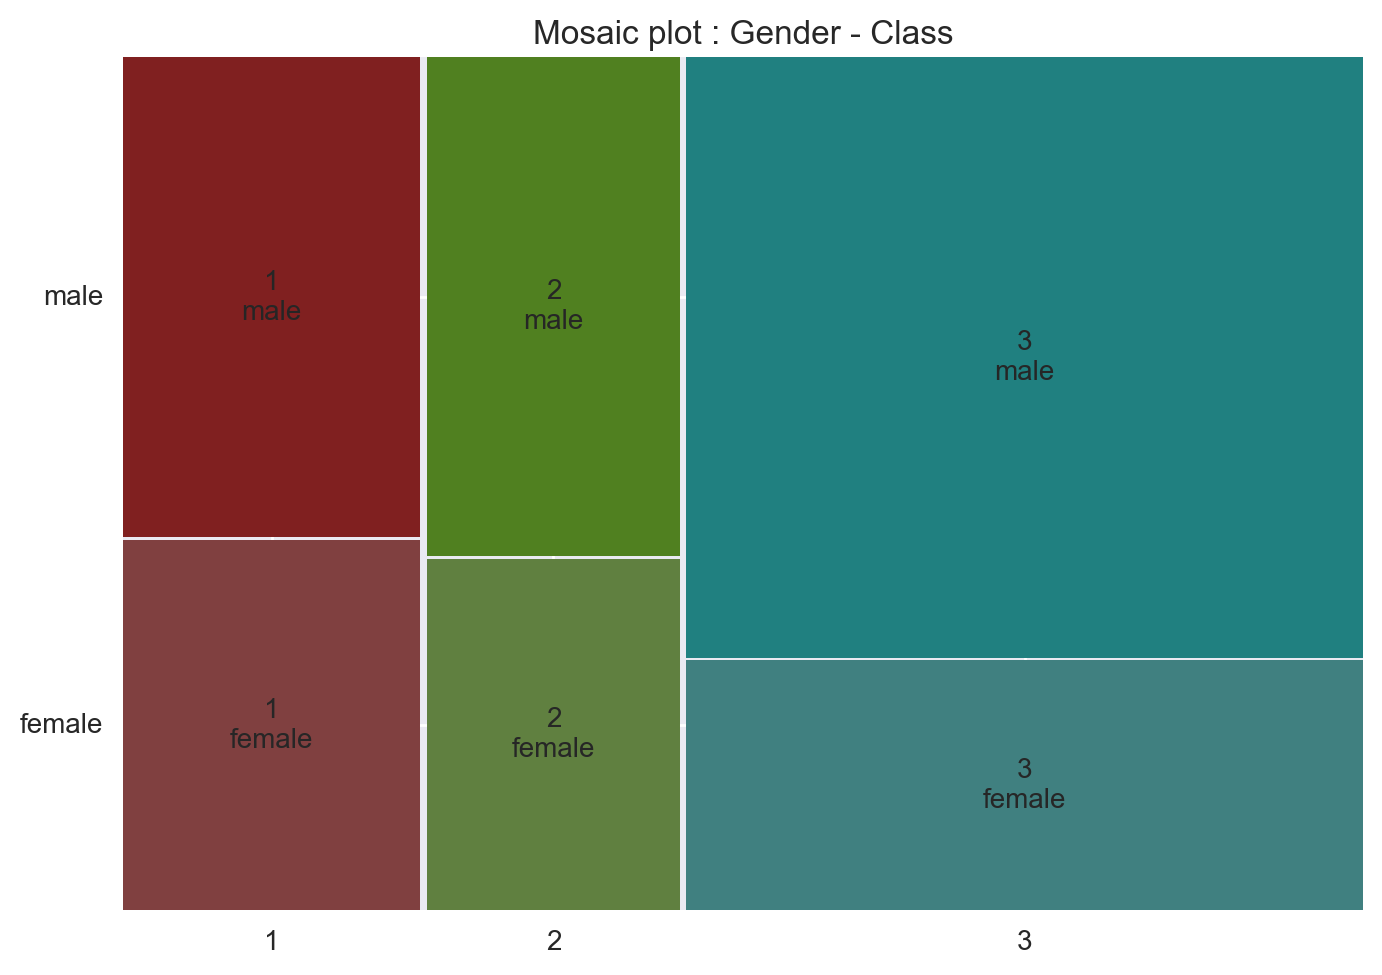

In [145]:
mosaic(ct.unstack())
plt.title("Mosaic plot : Gender - Class" )


plt.show()

#### Higher female rate for better class.
#### Could this be the reason why more people survived in better class ? 
### Survival rate table grouped by class and sex.

In [146]:
# table survival rate grouped by class and sex. 
df_class[['Pclass','Sex','Survived']].groupby(['Pclass','Sex']).mean()

Survived
Pclass Sex             
1      female  0.964706
       male    0.396040
2      female  0.918919
       male    0.151515
3      female  0.460784
       male    0.150198

#### Male survival rate in 1st class were higher than others.  There might be other reason why 1st class people survived more. we can't get in this analysis. As i guess 1st classes would be treated different way and 3rd class were in bottom of Titanic.
#### More information that i found, you can check major reason of this different survival rate for each class. 
Check this link.
http://dupoenglishiiimodernism.wikispaces.com/3rd+Hour+Group+3

## Emark

In [147]:
# Checking Null values
DATA['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [148]:
DATA['Embarked'].isnull().sum()

2

In [149]:
DATA['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [150]:
DATA[DATA['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [151]:
## We can fill these value with S, because most of passengers embaked at S.
## However, these two are not as many as we are not able to drop na.
## Drop na.
df_embark = DATA[['Survived','Embarked']].dropna()
df_embark = df_embark.copy()
df_embark.loc[:,'Survived'] = df_embark.loc[:,'Survived'].replace([0,1],['Died','Survived'])

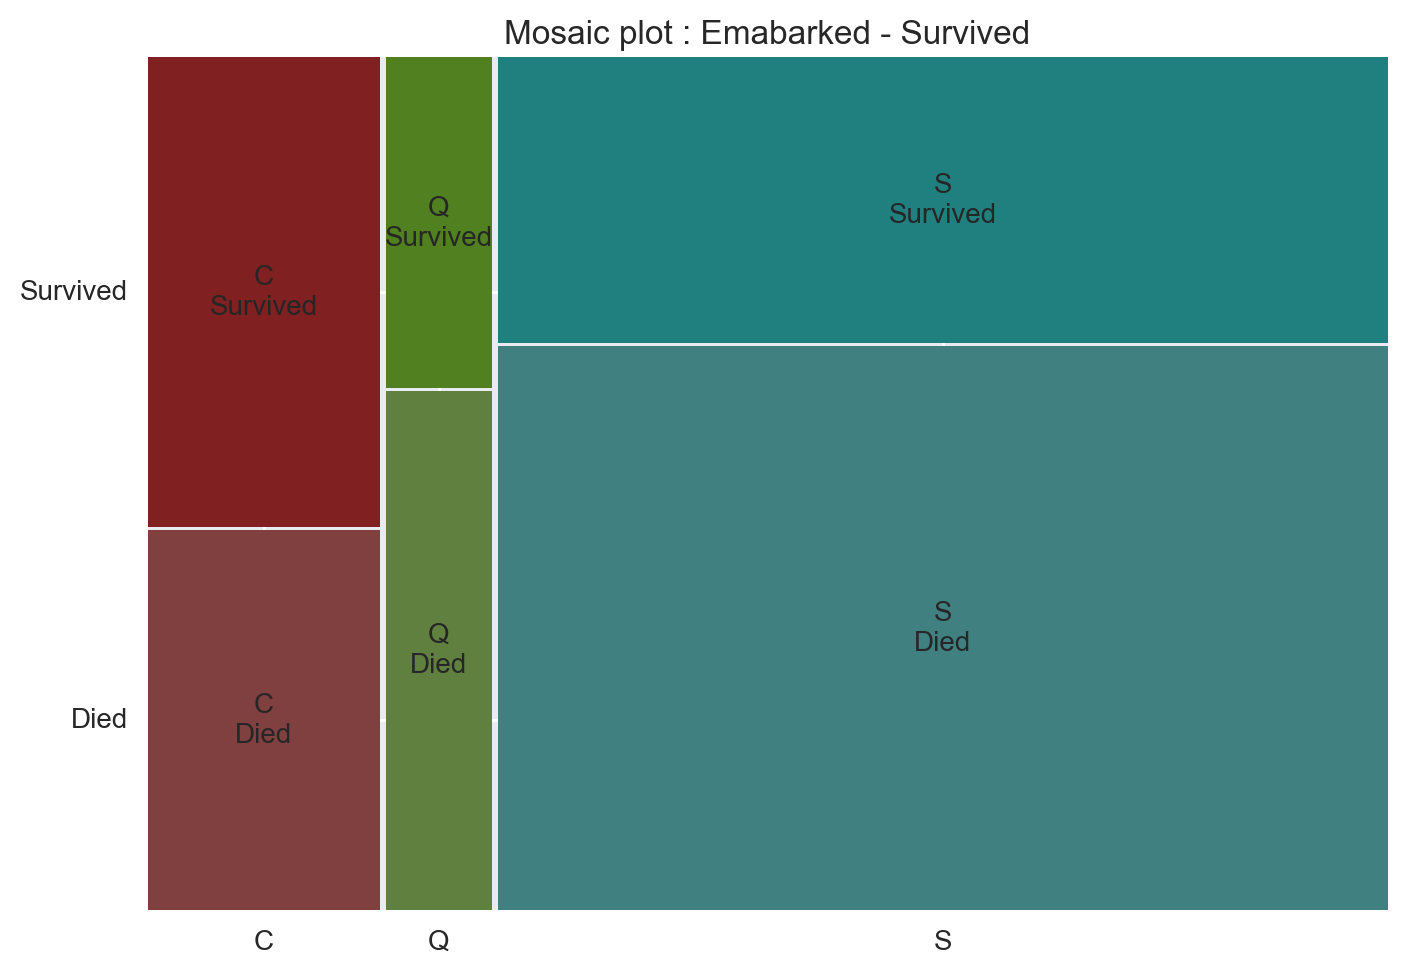

In [152]:
# Mosaic plot (Survived vs Embark)
ct2 = pd.crosstab(df_embark.Survived,df_embark.Embarked)
mosaic(ct2.unstack())
plt.title("Mosaic plot : Emabarked - Survived" )
plt.show()

#### I haven't thought there are relationships between embark and survived, so i checked relation between class end embark.

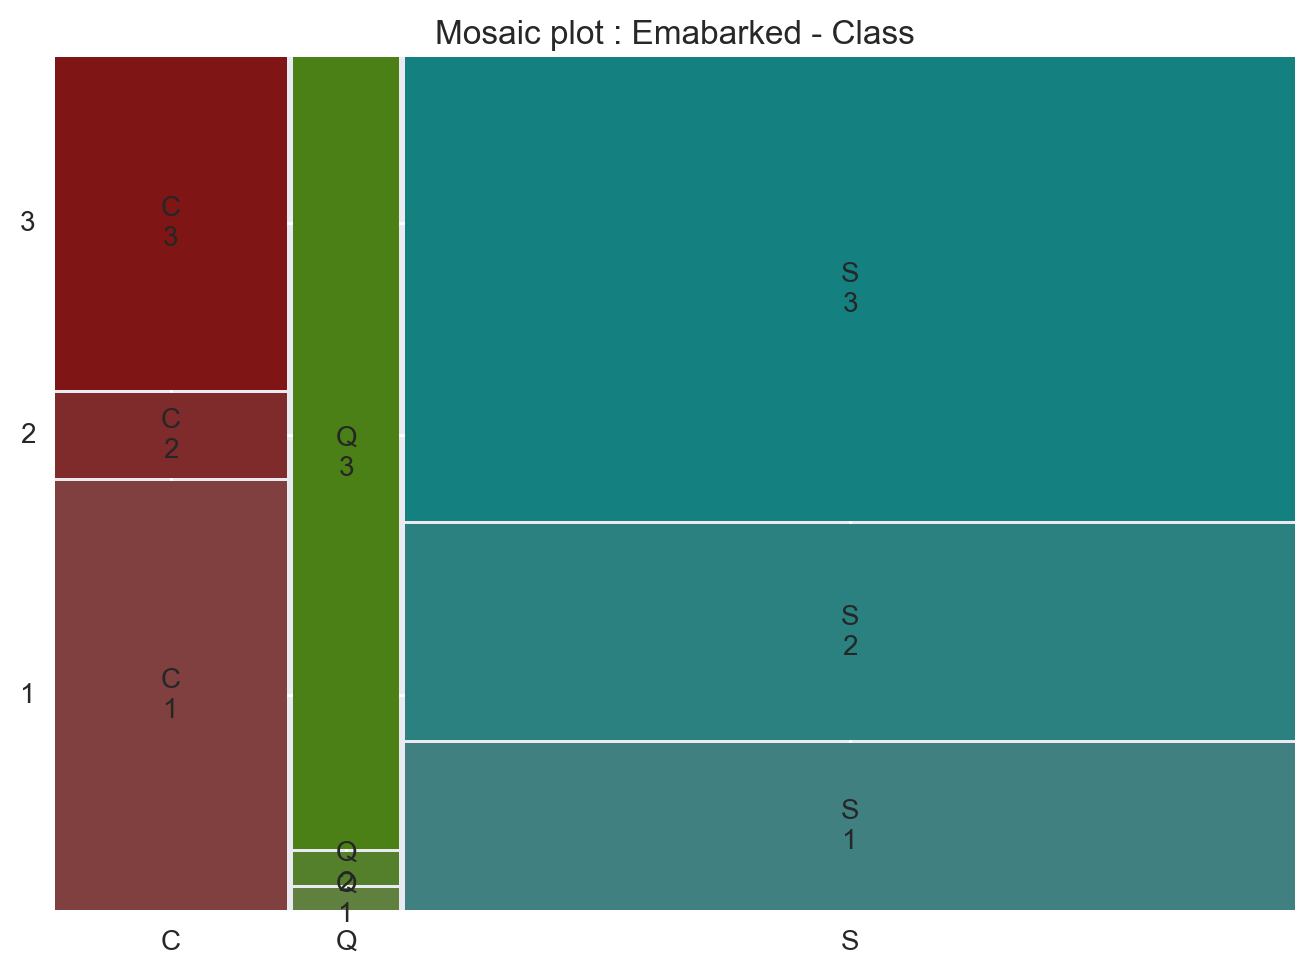

In [153]:
# Mosaic plot (Class vs Embark)
ct3 = pd.crosstab(DATA.Pclass,DATA.Embarked)
mosaic(ct3.unstack())
plt.title("Mosaic plot : Emabarked - Class" )
plt.show()

#### I need more detail about this mosaic plot to check if survival rate in embarked variable is related with class .

In [154]:
df_embark['class'] = DATA['Pclass']

In [155]:
df_embark['class'] = df_embark['class'].astype(str)
df_embark['class'] = df_embark['class'].astype(str)

In [156]:
df_embark['detail'] =  df_embark['Embarked'] + df_embark['class']

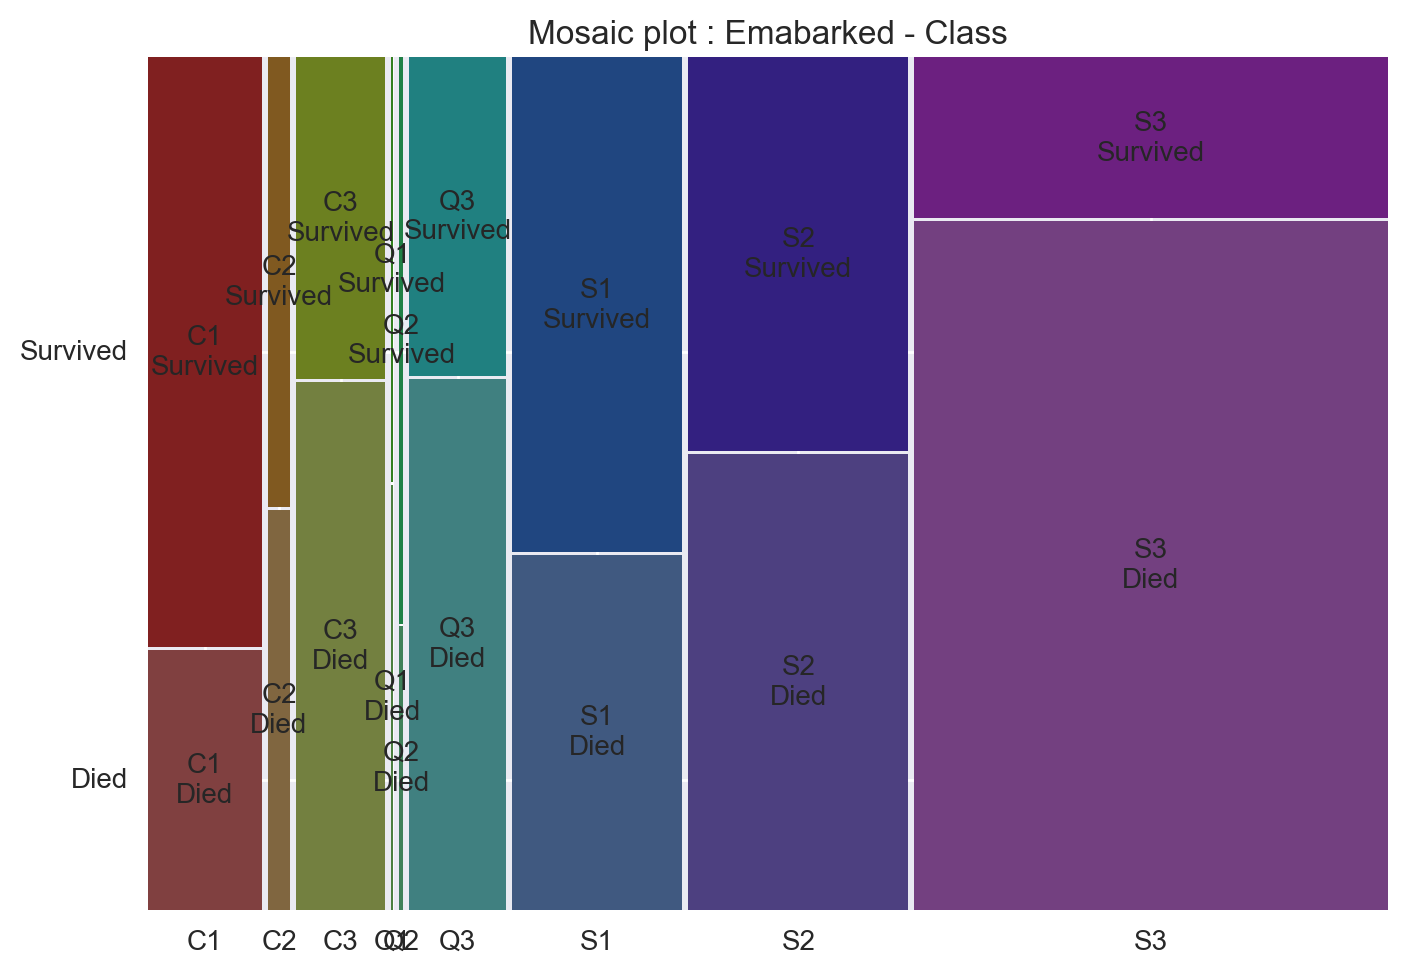

In [157]:
ct3 = pd.crosstab(df_embark.Survived,df_embark.detail)
mosaic(ct3.unstack())
plt.title("Mosaic plot : Emabarked - Class" )
plt.show()

####  According to this mosaic plot, Survival rate in embarked variable were related with class. Survival rate in C is higher than S in each class. I think this result came out because of biased data.

## Fare
* Fare might be related with class and survive rate.

In [158]:
df_fare = DATA[['Survived','Pclass','Fare']]

In [159]:
# Assign fare_survived and fare_died
fare_survived = DATA['Fare'][DATA['Survived']==1]
fare_died = DATA['Fare'][DATA['Survived']==0]

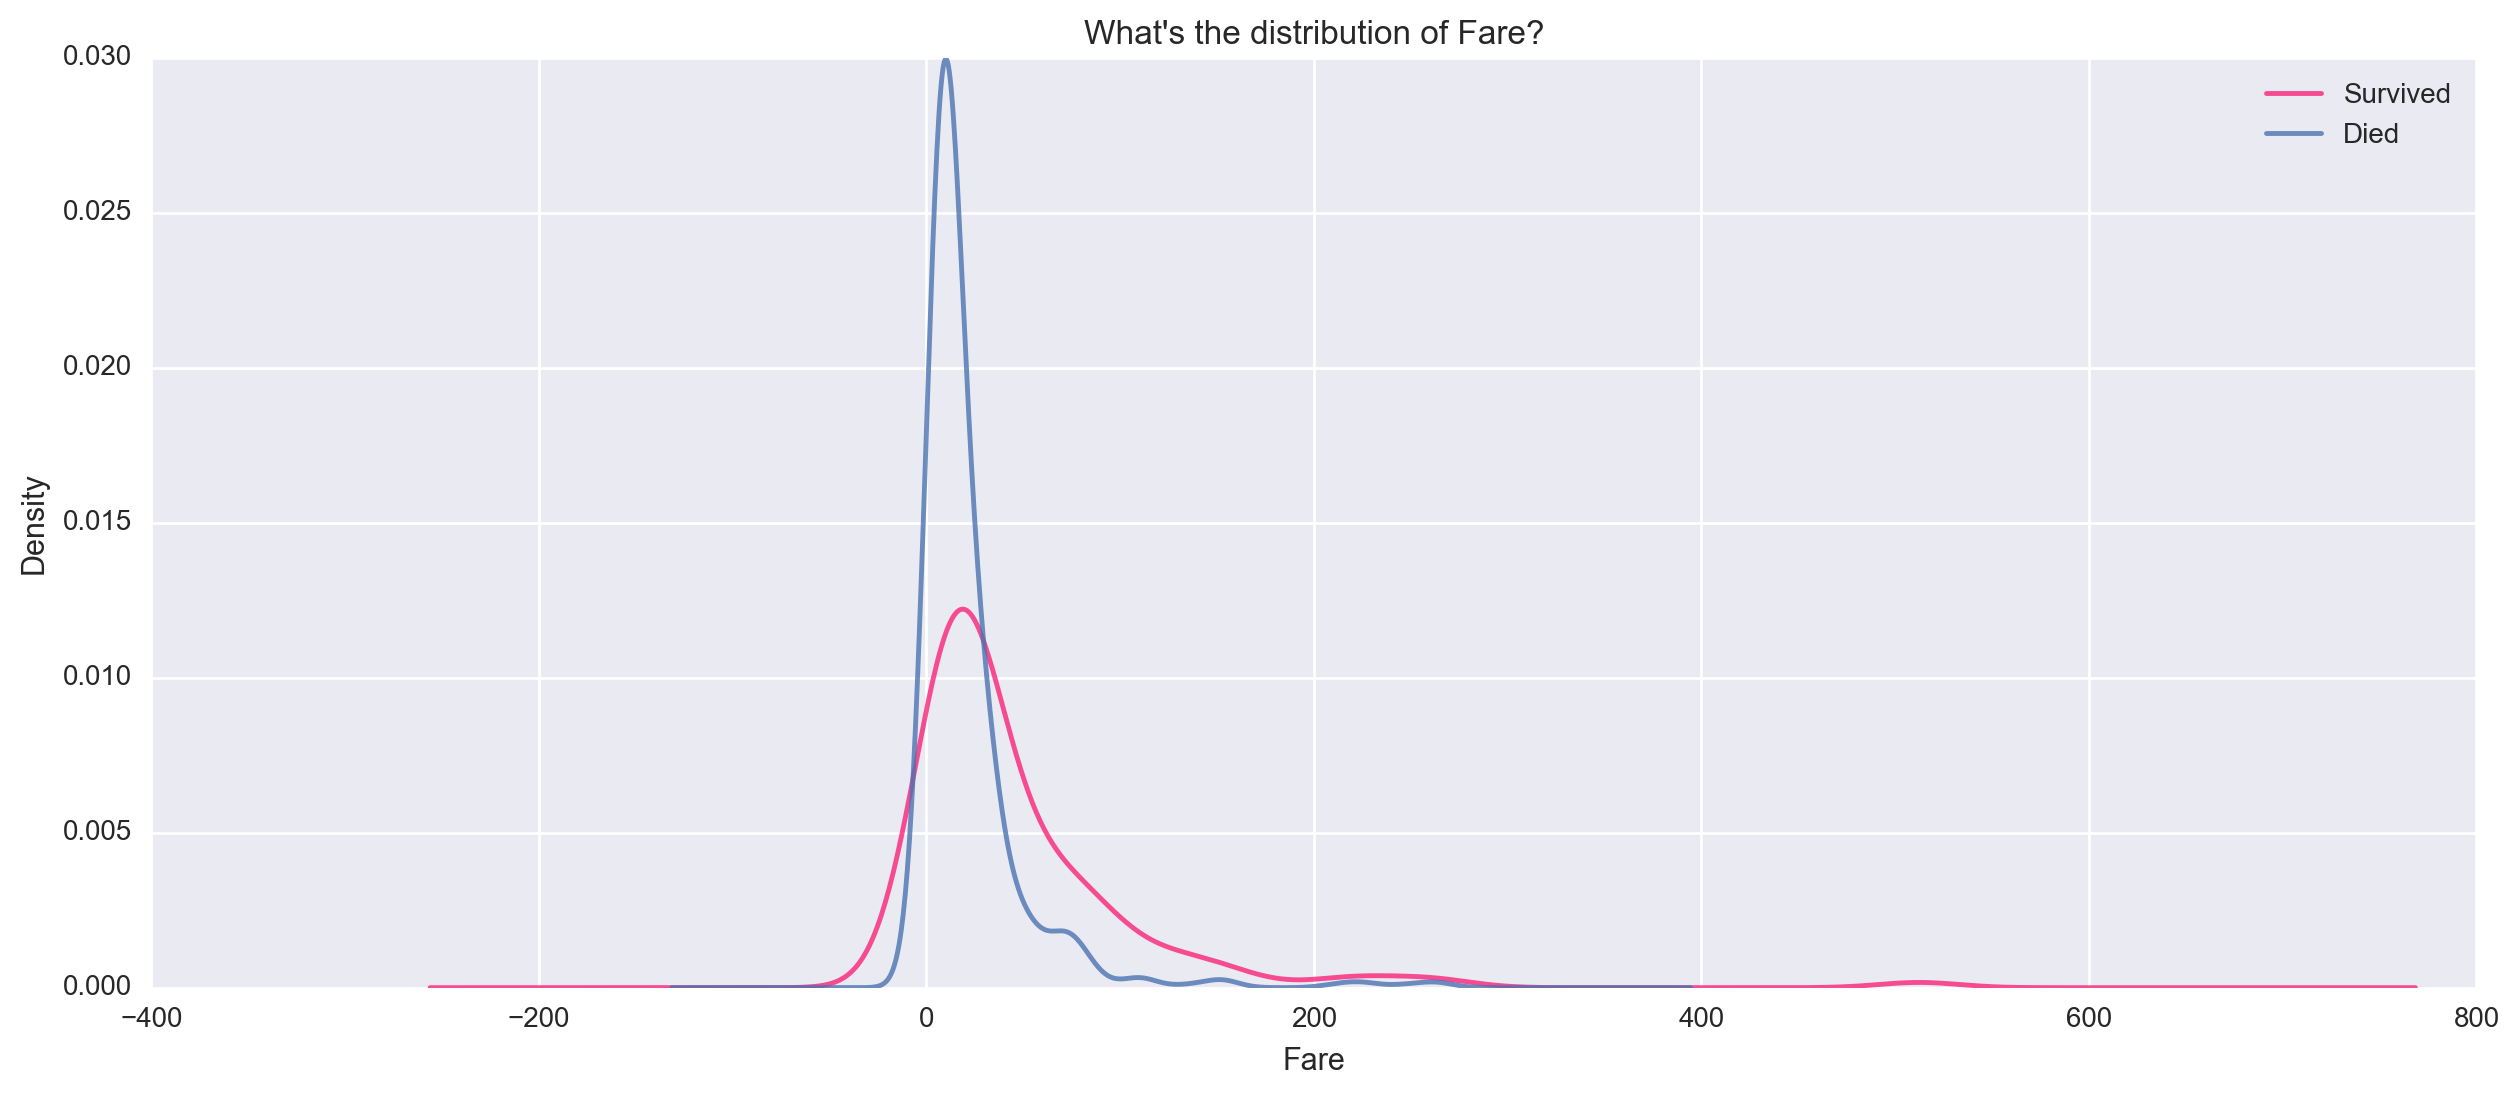

In [160]:
# Plotting Distribution 
fig = plt.figure(figsize=(15, 6))

fare_survived.plot(kind='density', color='#FA2379', label='Survived', alpha=0.8)
fare_died.plot(kind='density', label='Died', alpha=0.8)
plt.xlabel('Fare')
plt.title("What's the distribution of Fare?" )
plt.legend(loc='best')

plt.show()

#### From this pdf, fare might be related to class. It seems there is difference between mean  of each groups.
Let's check it out.

In [161]:
fare_survived.describe()

count    342.000000
mean      48.395408
std       66.596998
min        0.000000
25%       12.475000
50%       26.000000
75%       57.000000
max      512.329200
Name: Fare, dtype: float64

In [162]:
fare_died.describe()

count    549.000000
mean      22.117887
std       31.388207
min        0.000000
25%        7.854200
50%       10.500000
75%       26.000000
max      263.000000
Name: Fare, dtype: float64

### 95% t-test between two groups (unpaired)
#### Hypothese 

* Null Hypothesis : There is no different estimated mean of fare between who died and who survived
* Alternative Hypothesis : There is difference between two estimated means

In [163]:
ttest_ind(fare_survived, fare_died, equal_var=False)

Ttest_indResult(statistic=6.8390992590852537, pvalue=2.6993323503141236e-11)

### P-value is less than alpha. There is significant difference between estimated means.
### Check (Fare vs Pclass)

In [164]:
# Filltering Surived variable.
df_fare['Survived'] = df_fare['Survived'].map(survive)

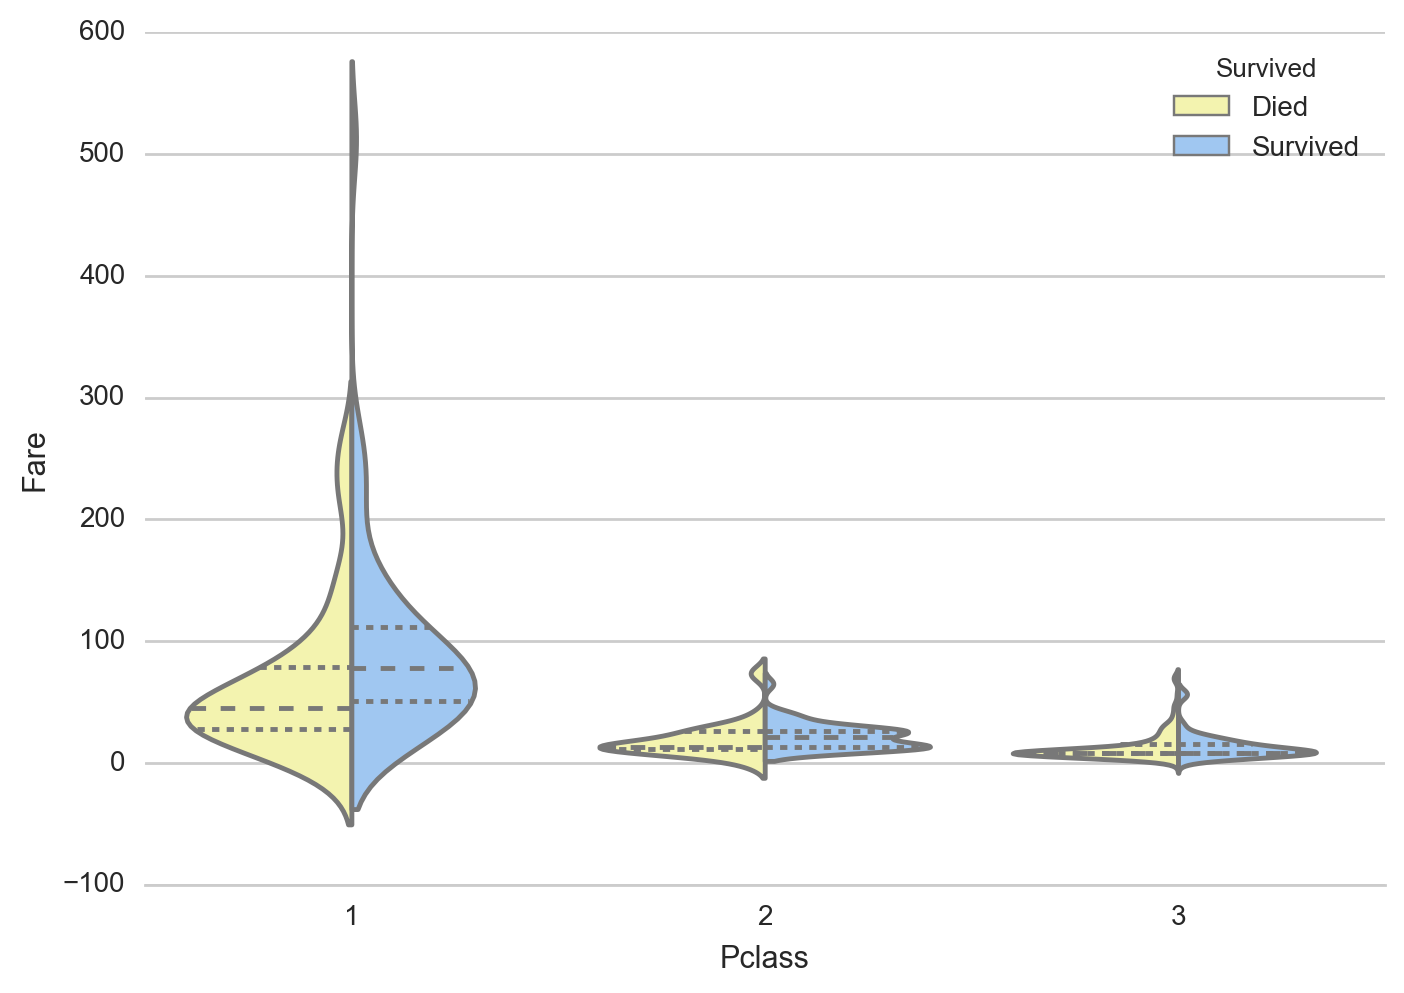

In [165]:
#violin plot 
sns.set(style="whitegrid", palette="pastel", color_codes=True)


sns.violinplot(x="Pclass", y="Fare", hue="Survived", data=df_fare, split=True,
               inner="quart", palette={"Survived": "b", "Died": "y"})
sns.despine(left=True)
plt.show()

The mean of fare of survived people for each class are different. More fare, more survived.

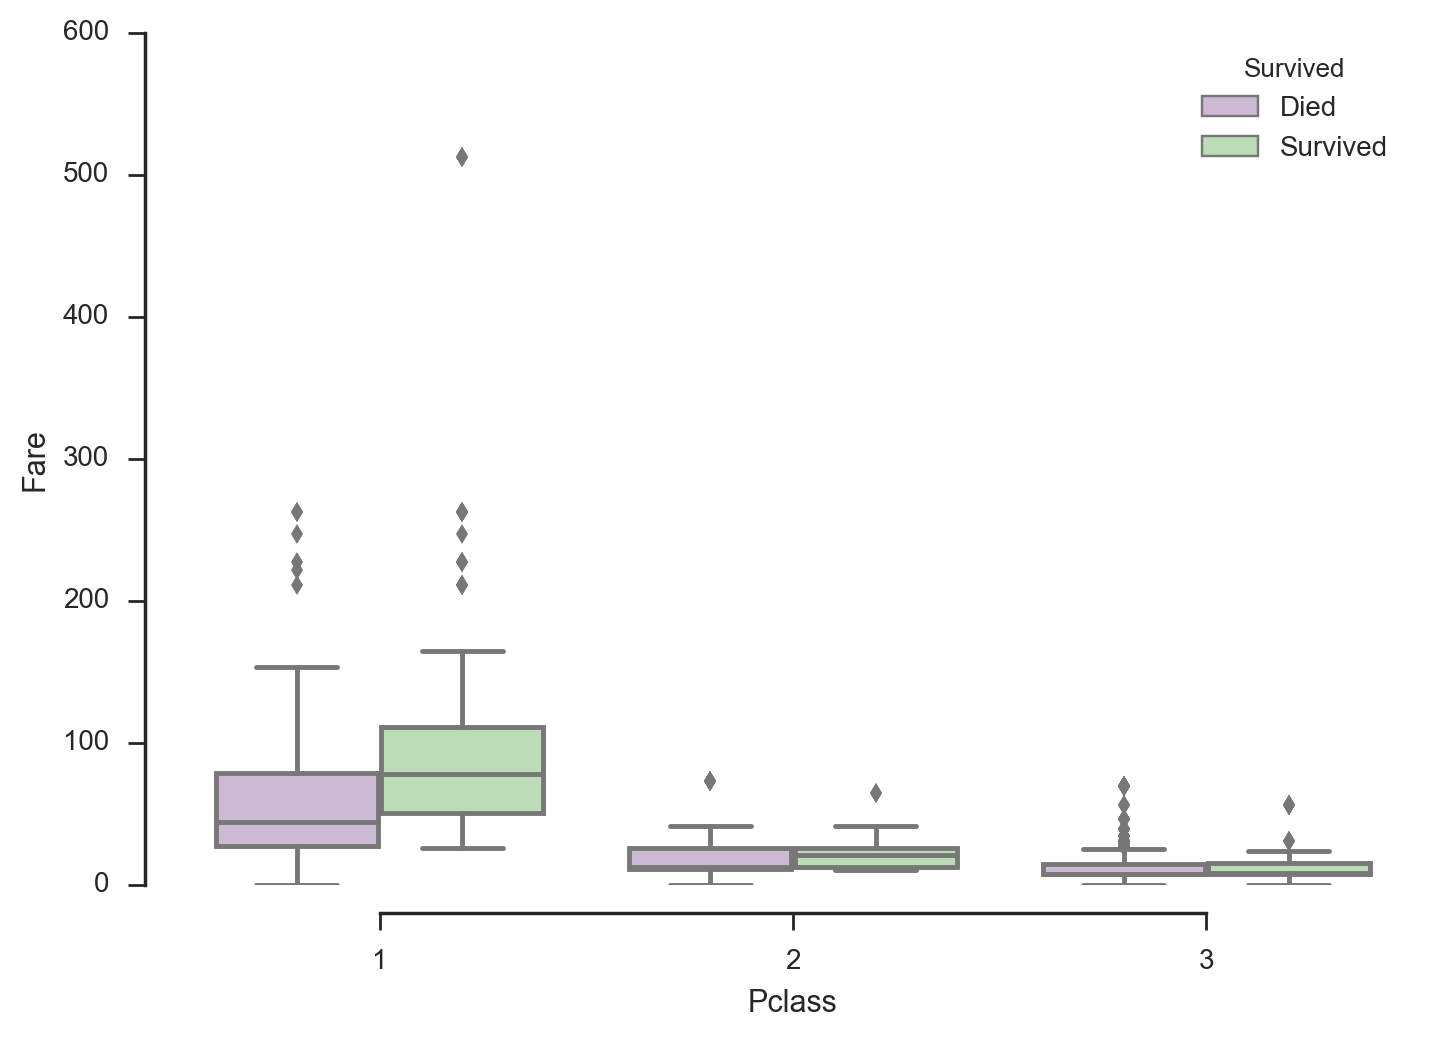

In [166]:
#Box plot
sns.set(style="ticks")

sns.boxplot(x="Pclass", y="Fare", hue="Survived", data=df_fare, palette="PRGn")
sns.despine(offset=10, trim=True)
plt.show()

By checking a boxplot, fare variable is relative to class variable.
let's look into outliers

In [167]:
# Check outliers
fare_class['Fare'][fare_class['Pclass']==1].max()

512.32920000000001

In [168]:
DATA[DATA['Fare']>512]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


## Family
* There might be people who have family or not.
* By adding values each rows in columns Age and Sibsp , we could get family size.

In [169]:
DATA.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


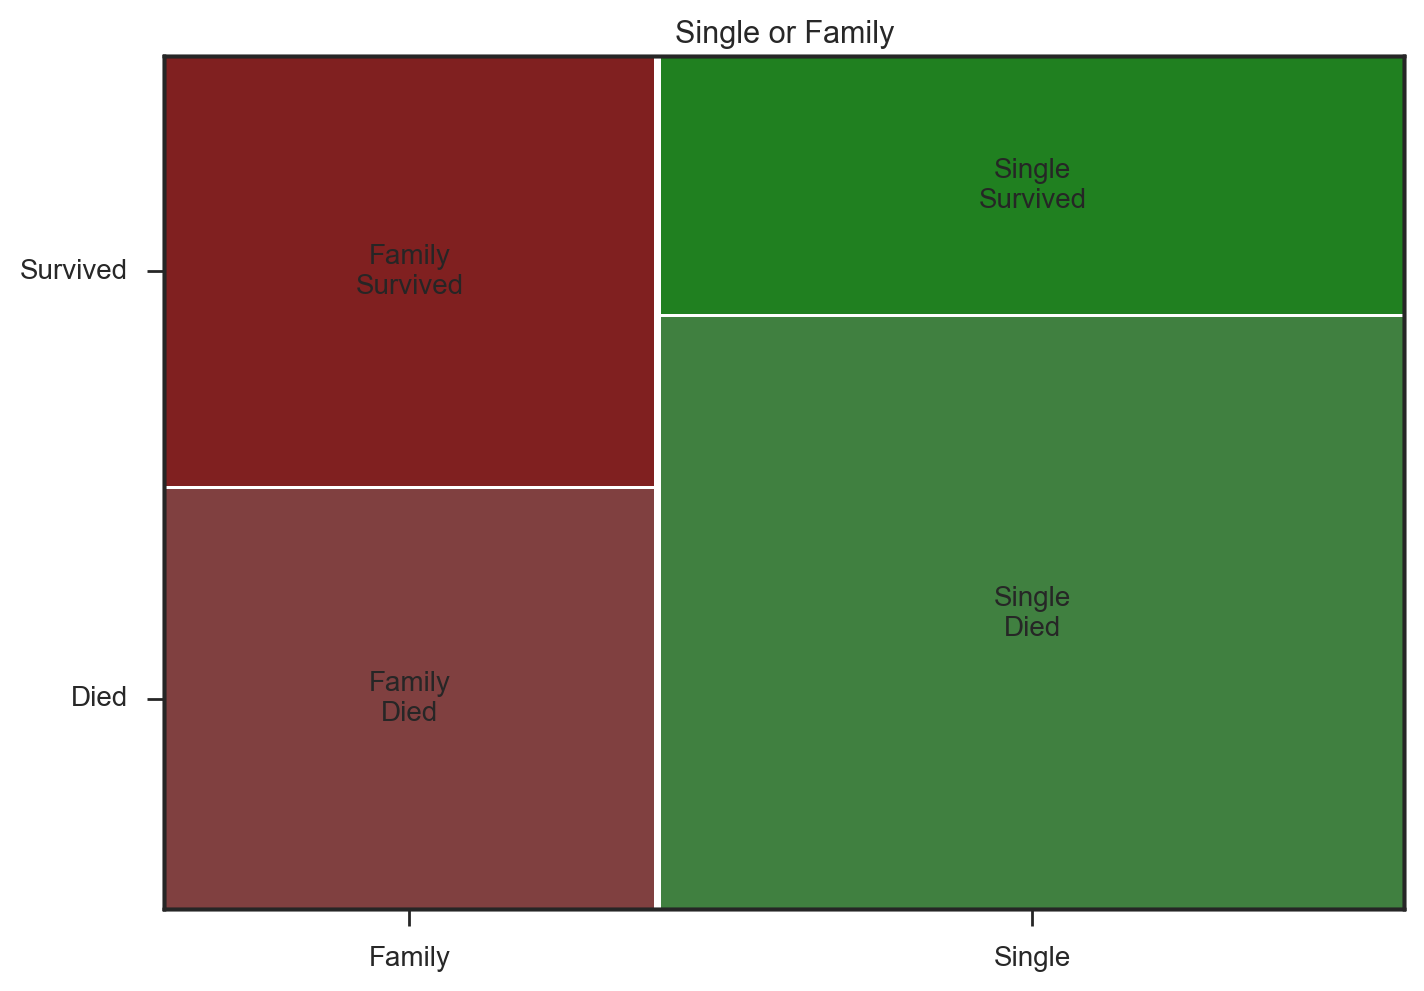

In [170]:
# Single or Not ?
family = DATA[['Survived','SibSp','Parch']]
family = family.copy()
family['family'] = family['SibSp'] + family['Parch']

def div(x) :
    if x == 0 :
        return 'Single'
    else :
        return 'Family'
def check(x) :
    if x == 0 :
        return 'Died'
    return 'Survived'

family['family'] = family['family'].map(div)
family['Survived'] = family['Survived'].map(check)

ct4 = pd.crosstab(family.Survived,family.family)
mosaic(ct4.unstack())
plt.xlabel('Single or Family')
plt.show()

####  - The number of passengers who are single is more than who have family. 
#### Survival rate in passengers who have family is higher than who have not family.

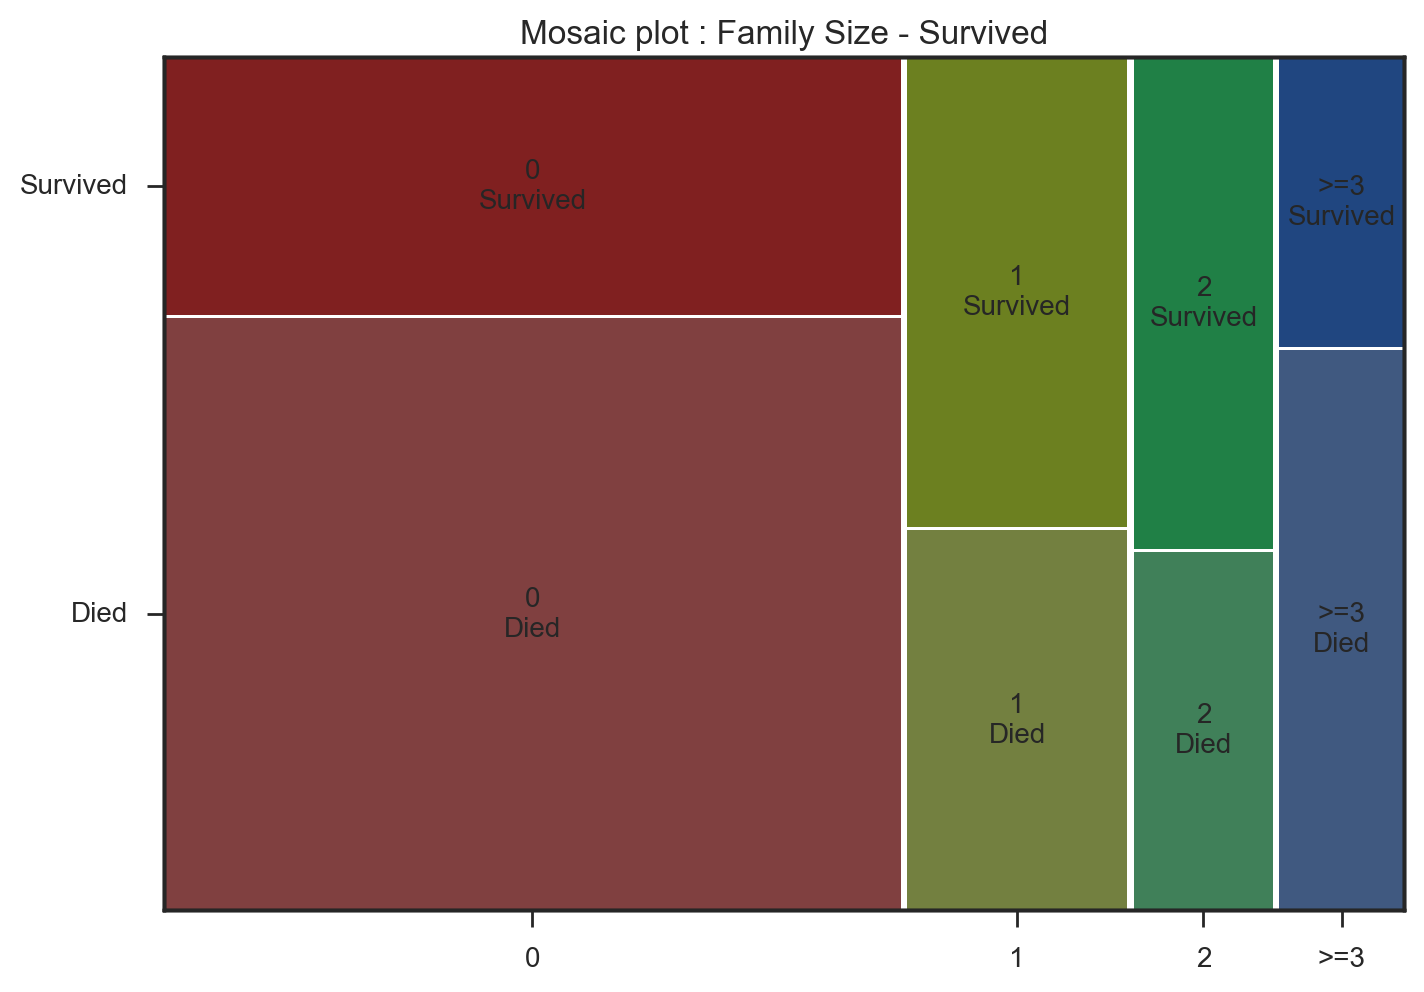

In [171]:
# Family size divided 1,2, more than 3
family_size = DATA[['Survived','SibSp','Parch','Pclass']]
family_size = family_size.copy()
family_size['family'] = family_size['SibSp'] + family_size['Parch']

def size(x) :
    if x > 2 :
        return '>=3'
    elif x == 2 :
        return '2'
    elif x == 1 :
        return '1'
    else :
        return '0'

family_size['family'] = family_size['family'].map(size)
family_size['Survived'] = family_size['Survived'].map(check)
ct4 = pd.crosstab(family_size.Survived,family_size.family)
mosaic(ct4.unstack())
plt.title("Mosaic plot : Family Size - Survived" )
plt.show()

#### - As we can see, survival rate is relative to the family size. However, If family size is more than three, survival rate is close to single's survival rate. Maybe, If family size is large, people would be wandering cabins to find their family  or bought tickets for 3rd class because of expensive fare. In addition, they might be emigrants.
### * Check Pclass with family size.

In [172]:
family_size[family_size['family']=='>=3'].groupby('Pclass').family.count()

Pclass
1    13
2    15
3    63
Name: family, dtype: int64

#### - Most of family whose family size is more than 3 were in 3rd class.

## Conclusion

I checked if survival rate is relative to age, gender, class, embarked, family size and fare.
Obviously, i can say that women and children were rescued first depending on result from charts and graphs from data.
Suprisingly, Other variables are relative to class and class varible describes survival rate well.
Gender, age and class might be important variables to make a predict model.

### limitations
This data came from training set which is subtracted from full data. So there would be baises. Some null variables espeacilly in age make analysis biased. Cabin variable could be really good to analyze but there are much null variables as well.


### References
* Documents in Pandas , Matplotlib, Stats, Scipy and Seaborn